## Import libraries and settings

In [2]:
#import necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib as plt 
%matplotlib inline

## Import dataset

In [3]:
#create the file path string of the instagram influencer csv file

file_path_instagram = r'C:\Users\phkya\Documents\GitHub\instagram_influencer\Instagram Influencer\social media influencers - instagram.csv'

#create a data frame named 'inst_infl' 

inst_infl=pd.read_csv(file_path_instagram)

#check for the first 10 columns
inst_infl.head(10)



,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
5,_mariahwasa,HWASA,NaN,NaN,7.9M,Brazil,915.1K,1.2M
6,_rl9,Robert Lewandowski,Sports with a ball,NaN,25M,Poland,588.6K,749K
7,_seorina,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,Cinema & Actors/actresses,3M,South Korea,803.9K,997.8K
8,_shotaroo_,SHOTARO ショウタロウ,NaN,NaN,4.9M,Indonesia,860.1K,1.1M
9,03_hu,박지후,NaN,NaN,4.1M,South Korea,711K,872.6K


## Data Overviews

In [4]:
#pull out columns name for later usage
inst_infl.columns


Index(['Influencer insta name', 'instagram name', 'category_1', 'category_2',
       'Followers', 'Audience country(mostly)', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')

In [5]:
#rename columns of the df for better readability

inst_infl=inst_infl.rename(columns={'Authentic engagement\r\n':'authentic_engagement',
                          'Engagement avg\r\n':'engagement_avg',
                          'Influencer insta name':'infl_inst_name',
                          'instagram name':'inst_name',
                          'Audience country(mostly)':'most_audience_country',
                         'Followers':'followers'})
#recheck for the column name
inst_infl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   infl_inst_name         1000 non-null   object
 1   inst_name              979 non-null    object
 2   category_1             892 non-null    object
 3   category_2             287 non-null    object
 4   followers              1000 non-null   object
 5   most_audience_country  986 non-null    object
 6   authentic_engagement   1000 non-null   object
 7   engagement_avg         1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [6]:
#check for the overall count of null and not null, also check on the data types of each columns 

inst_infl.info()

#we notice that there are columns' data that suppose to be integer but it was displayed as 'object'. we will fix it
#by reformatting the data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   infl_inst_name         1000 non-null   object
 1   inst_name              979 non-null    object
 2   category_1             892 non-null    object
 3   category_2             287 non-null    object
 4   followers              1000 non-null   object
 5   most_audience_country  986 non-null    object
 6   authentic_engagement   1000 non-null   object
 7   engagement_avg         1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [7]:
# find the influencer with the highest followers 

inst_infl.sort_values('followers', ascending = False).head(1)

,infl_inst_name,inst_name,category_1,category_2,followers,most_audience_country,authentic_engagement,engagement_avg
863,subo_m,Subhan Mamedov,Shows,NaN,9M,Russia,294.2K,360.4K


In [8]:
#find the influencer with the highest average engagement 

inst_infl.sort_values('engagement_avg',ascending = False).head(1)

,infl_inst_name,inst_name,category_1,category_2,followers,most_audience_country,authentic_engagement,engagement_avg
967,xxxibgdrgn,권지용(權志龍),Photography,Fashion,20.6M,Indonesia,785.3K,999.1K


In [9]:
#find the influencer with the highest authentic engagement

inst_infl.sort_values('authentic_engagement',ascending = False).head(1)

,infl_inst_name,inst_name,category_1,category_2,followers,most_audience_country,authentic_engagement,engagement_avg
626,miguel.g.herran,Miguel Herrán,Cinema & Actors/actresses,NaN,14.2M,Brazil,998.2K,1.5M


## Data Cleaning

We notice that there are columns' data that suppose to be integer but it was displayed as 'object'. we will fix it by reformatting the data types

1. We will work with the 'followers' column first


In [10]:

#First is to remove the 'M' within the data

inst_infl.followers= inst_infl['followers'].str.replace('M',"")

#reformat the data into 'float' and multiplied with 1 million

inst_infl.followers= inst_infl['followers'].astype(float)

#recheck the data type of 'followers'

inst_infl.followers.dtype

dtype('float64')

The values need to be multiply by 1 million to be suitable for analyzing 

In [11]:
#multiply the result by 1 million

inst_infl.followers= inst_infl.followers * 1000000

#check for the data of 'followers' after modification
inst_infl['followers']

0       48500000.0
1       12700000.0
2       18800000.0
3       13500000.0
4       11100000.0
          ...     
995    136100000.0
996     31200000.0
997     13900000.0
998      8200000.0
999      9400000.0
Name: followers, Length: 1000, dtype: float64

We will do the same process with 'authentic_engagement' and 'engagement_avg'

Since there are letter 'M' and letter 'K' inside the data we will have to remove both of them 
we have to develope a function to tell difference between the 'M' and 'K' and multiply with 1 million or 1 hundred thousand accordingly

In [13]:
#2.'authentic_engagement' data reformat 



def convert_scale(value):
    if value.endswith("M"):
        return float(value[:-1]) * 10**6
    elif value.endswith("K"):
        return float(value[:-1]) * 10**3
    else:
        return float(value)
       
    

In [14]:
#we then apply the function into authentic_engagement to process its data 
inst_infl.authentic_engagement=inst_infl['authentic_engagement'].apply(convert_scale)

In [15]:
#3. we apply the same function into the engagement_avg column 

inst_infl.engagement_avg=inst_infl['engagement_avg'].apply(convert_scale)

In [24]:
inst_infl.head()

,infl_inst_name,inst_name,category_1,category_2,followers,most_audience_country,authentic_engagement,engagement_avg
0,433,433,Sports with a ball,NaN,48500000.0,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,NaN,12700000.0,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000.0,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,NaN,13500000.0,Indonesia,1100000.0,1400000.0
4,_jeongjaehyun,Jaehyun,NaN,NaN,11100000.0,Indonesia,2500000.0,3100000.0


## Exploratory Analysis

#4. figure out the top 10 most follower 

Text(0.5, 1.0, 'Top 10 Influencers with most followers')

C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129293 missing from current font.
  font.set_text(s, 0, flags=flags)


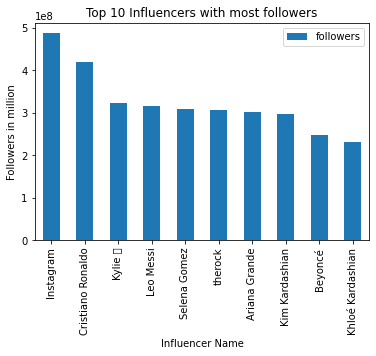

In [25]:

#create a sub df with followers
inst_infl_followers = inst_infl[['infl_inst_name','inst_name','followers']]

#query the top 10 follower instagram account 
sorted_top10_fl= inst_infl_followers.sort_values('followers', ascending = False)

#create graph for the top 10
dfplot_fl= sorted_top10_fl.groupby('inst_name').head(10)


#create a bar plot 
dfplot_fl.head(10).plot(x='inst_name',y='followers',kind = 'bar')


#rename axis
plt.pyplot.xlabel('Influencer Name')

plt.pyplot.ylabel( "Followers in million")

plt.pyplot.title("Top 10 Influencers with most followers")


#5. Top 10 Influencers who has the most average engagement 

Text(0.5, 1.0, 'Top 10 Influencers with highest average engagement')

C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phkya\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44592 missing from curre

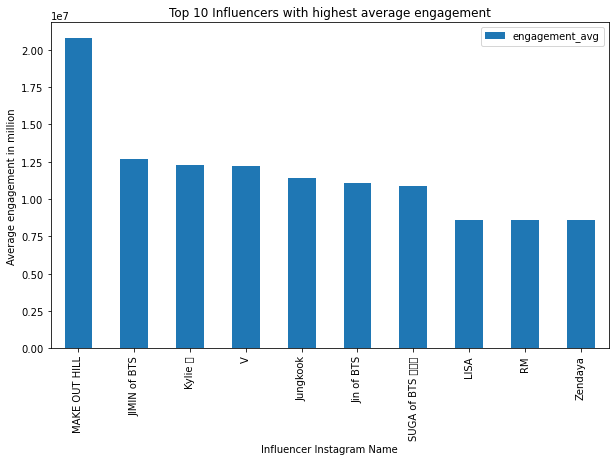

In [26]:


#create sub df for analysis
inst_infl_avg_eng= inst_infl[['infl_inst_name','inst_name','engagement_avg']]

#sort by engagement average
sorted_top10_avgeng= inst_infl_avg_eng.sort_values('engagement_avg', ascending = False)

#group by instagram name of the influencers and pickout top 10
dfplot_avgeng = sorted_top10_avgeng.groupby('inst_name').head(10)

#create a bar graph
dfplot_avgeng.head(10).plot(x='inst_name', y= 'engagement_avg', kind='bar',figsize=(10,6))

plt.pyplot.xlabel('Influencer Instagram Name')

plt.pyplot.ylabel( "Average engagement in million")

plt.pyplot.title("Top 10 Influencers with highest average engagement")

#6. Top 10 influencers with most authentic engagement 

Text(0.5, 1.0, 'Top 10 Influencers with highest authentic engagement')

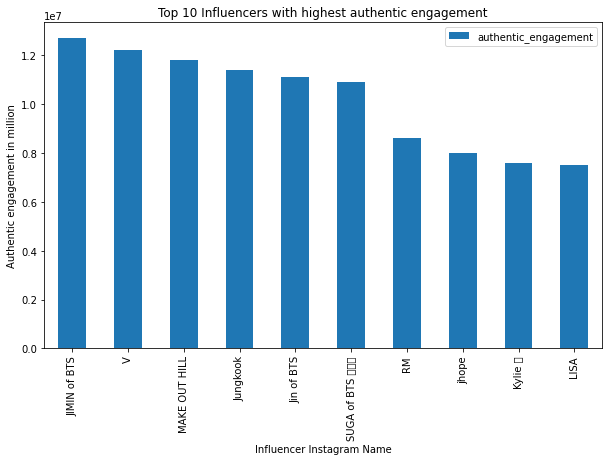

In [27]:

#create sub df for analysis 
inst_infl_autheng= inst_infl[['infl_inst_name','inst_name','authentic_engagement']]

#sort by authentic_engagment 

sorted_top10_autheng= inst_infl_autheng.sort_values('authentic_engagement', ascending = False)

#group by instagram name of the influencers and pickout top 10
dfplot_autheng = sorted_top10_autheng.groupby('inst_name').head(10)

#create a bar graph
dfplot_autheng.head(10).plot(x='inst_name', y= 'authentic_engagement', kind='bar',figsize=(10,6))

plt.pyplot.xlabel('Influencer Instagram Name')

plt.pyplot.ylabel( "Authentic engagement in million")

plt.pyplot.title("Top 10 Influencers with highest authentic engagement")


In [16]:
inst_infl[['authentic_engagement','engagement_avg']].corr()

,authentic_engagement,engagement_avg
authentic_engagement,1.000000,0.965709
engagement_avg,0.965709,1.000000


#7. we will check for correlation between authentic engagement and average engagement
#using corr() and visualize it 

<AxesSubplot:xlabel='authentic_engagement', ylabel='engagement_avg'>

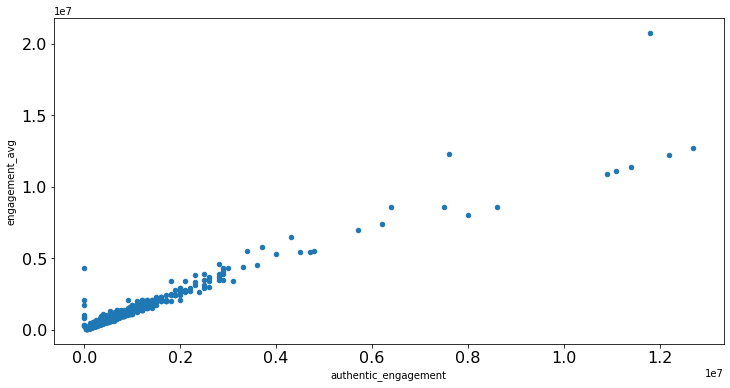

In [17]:

inst_infl[['authentic_engagement','engagement_avg']].plot.scatter(figsize = (12,6),
                                                                  fontsize = 16,
                                                                  x='authentic_engagement',
                                                                  y='engagement_avg'
                                                                  )



There are positive correlation between authentic engagement and engagement average 

#8. It is also interesting to figure out which countries involve the most in Instagram influencers activity


In [29]:
country_count= inst_infl[['infl_inst_name','most_audience_country']].groupby('most_audience_country').count()

#sort the top 5 country with most appearance 
country_count.sort_values('infl_inst_name',ascending = False).head(5)

,infl_inst_name
most_audience_country,
United States,279
Brazil,152
India,149
Indonesia,134
Mexico,45


Finding : 
United States was no.1 with 279 appearence as most audience country among the influencers

#9. Discover which  category is the most popular 
 we will calculate the appearance of each categories to figure which one is the most popular 

In [30]:

# create a sub df with only categories

cat1= inst_infl[['category_1']]
cat2= inst_infl[['category_2']]
#remove null values

cat1= cat1.dropna()
cat2 = cat2.dropna()

cat2=cat2.rename(columns={'category_2':'category_1'})


#append the 2 sub df to create a bigger df with all the occurance of categories

cat_srs=pd.concat([cat1,cat2], ignore_index = True)
 
cat_srs=cat_srs.groupby('category_1')[['category_1']].count()

cat_srs= cat_srs.rename(columns = {'category_1':'category'})


#query the top 10 most famous categories
cat_srs.sort_values('category',ascending= False).head(10)

,category
category_1,
Cinema & Actors/actresses,273
Music,250
Lifestyle,154
Sports with a ball,119
Modeling,66
Shows,59
Beauty,40
Art/Artists,29
Humor & Fun & Happiness,28
